<a href="https://colab.research.google.com/github/Vincenzo-Miracula/MasterSDS/blob/main/tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

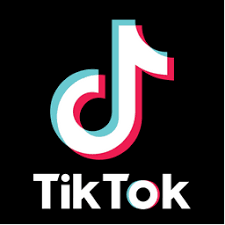

# Analisi del Codice Python per Estrarre Commenti da TikTok

### 1. Importazione delle Librerie
Il codice utilizza le seguenti librerie:

- **requests**: Per fare richieste HTTP, in questo caso per ottenere i dati dal server di TikTok.
- **json**: Per lavorare con il formato JSON (serializzare e deserializzare i dati).
- **datetime**: Per convertire i timestamp in date leggibili.

### 2. Variabili e URL
Il codice definisce l'URL del video TikTok dal quale si estrarranno i commenti. Da questo URL, viene estratto l'ID del video:

- **post_url**: L'URL del video TikTok.
- **post_id**: L'ID del video estratto dall'URL.

### 3. Headers
Il codice definisce i headers necessari per simulare una richiesta proveniente da un browser, evitando che TikTok blocchi la richiesta:

- **headers**: Headers utilizzati per simulare una richiesta da un browser legittimo.

### 4. Variabile `curs`
- **curs**: La variabile indica il punto di partenza dei commenti da raccogliere, utile per la paginazione.

### 5. Funzione `req`
La funzione invia una richiesta GET all'API di TikTok per ottenere i commenti del video specificato dall'ID:

- **Funzione `req`**: Invia una richiesta GET per ottenere i commenti di TikTok tramite l'ID del post. L'URL della richiesta include vari parametri necessari per accedere ai dati.

### 6. Funzione `convert_timestamp`
Questa funzione converte un timestamp (secondi da Epoch) in una data leggibile:

- **Funzione `convert_timestamp`**: Converte un timestamp in un formato leggibile (YYYY-MM-DD HH:MM:SS).

### 7. Funzione `extract_data`
La funzione `extract_data` estrae le informazioni dei commenti dai dati JSON restituiti dall'API:

- **Funzione `extract_data`**: Estrae informazioni dai commenti, inclusi il titolo del video, l'autore del commento, il testo del commento, la lingua e la data di creazione. Questi dati vengono salvati in un dizionario.

### 8. Chiamata alle Funzioni e Salvataggio dei Dati
Dopo aver ottenuto i dati tramite la funzione `req(post_id)` e averli elaborati con `extract_data(data)`, i commenti vengono salvati in un file JSON:

- **Funzione `json.dump`**: Salva i dati estratti (i commenti) in un file JSON con formattazione leggibile.

In [1]:
import requests
import json
from datetime import datetime
import pandas as pd

In [2]:
# URL del video (puoi cambiarlo con l'URL che desideri esplorare)
post_url = 'https://www.tiktok.com/@nunuobe/video/7126462242182155525'

# Estrai l'ID del post dall'URL
post_id = post_url.split('/')[-1]

# Headers per simulare una richiesta da browser (evitare blocchi da parte di TikTok)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'
}

In [5]:
curs=0
# Funzione per fare la richiesta al server TikTok
def req(post_id):
    url = f'https://www.tiktok.com/api/comment/list/?WebIdLastTime=1729273214&aid=1988&app_language=en&app_name=tiktok_web&aweme_id={post_id}&browser_language=en-US&browser_name=Mozilla&browser_online=true&browser_platform=Win32&browser_version=5.0%20%28Windows%20NT%2010.0%3B%20Win64%3B%20x64%29%20AppleWebKit%2F537.36%20%28KHTML%2C%20like%20Gecko%29%20Chrome%2F129.0.0.0%20Safari%2F537.36&channel=tiktok_web&cookie_enabled=true&count=20&cursor={curs}&data_collection_enabled=false&device_id=7427171842932786693&device_platform=web_pc&focus_state=true&from_page=video&history_len=6&is_fullscreen=false&is_page_visible=true&odinId=7427171704705188869&os=windows&priority_region=&referer=&region=CA&screen_height=1080&screen_width=1920&tz_name=Asia%2FTehran&user_is_login=false&webcast_language=en&msToken=U488DBL2ELMV88PxvXu7bOKQJVxuv7LnhKNHsWaOT2uQhpGyj5M-7EmUsXBIS9HbQ_bQ35u3Za-f_hVhHMMYsH-4mxWPeJoUeMhgOHOvQ-IaKb5lr3DlgBIYJXCUc9MCexCHXig1u4a98hVjnec74fs=&X-Bogus=DFSzswVYtfhANH-ltQ2xJbJ92U6T&_signature=_02B4Z6wo000017DRplgAAIDBt3uT.9qT9Zew0aLAAIsv87'
    response = requests.get(url, headers=headers)
    return response.json()

def convert_timestamp(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

In [3]:
def extract_data(data):
    comments_data = []

    # Estrai il titolo del video
    video_title = data.get('comments', [])[0].get('share_info', {}).get('title', 'No title')

    # Estrai i commenti
    for cm in data.get('comments', []):
        comment_info = {}
        # Username dell'autore del commento
        username = cm.get('user', {}).get('nickname', 'Unknown')
        # Commento
        comment_text = cm.get('text', '')
        # lingua
        comment_language = cm.get('comment_language', 'Unknown')
        # data creazione
        create_time = cm.get('create_time', 'Unknown')
        if create_time != 'Unknown':
            create_time = convert_timestamp(create_time)

        # Aggiungi il dato all'elenco
        comment_info['video_title'] = video_title
        comment_info['username'] = username
        comment_info['comment'] = comment_text
        comment_info['comment_language'] = comment_language
        comment_info['create_time'] = create_time

        comments_data.append(comment_info)

    return comments_data

In [ ]:
# Chiamata alla funzione
data = req(post_id)
comments = extract_data(data)


# Salva i dati in un file JSON
with open('comments_output1.json', 'w', encoding='utf-8') as f:
    json.dump(comments, f, ensure_ascii=False, indent=4)

print("\nData has been saved to: 'comments_output.json'")
print('\n')
df = pd.DataFrame(comments)
df